In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import keras
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.

In [2]:
df = pd.read_csv("BTC_coinmarketcap.csv", sep = ";")

In [3]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
0,2025-11-21T00:00:00.000Z,2025-11-21T23:59:59.999Z,2025-11-21T00:40:00.000Z,2025-11-21T12:30:00.000Z,2781,86528.772761,87380.807905,80659.812426,85090.686114,1.291575e+11,1.697767e+12,19950600.0,2025-11-21T23:59:59.999Z
1,2025-11-20T00:00:00.000Z,2025-11-20T23:59:59.999Z,2025-11-20T05:07:00.000Z,2025-11-20T19:09:00.000Z,2781,91459.351553,93025.070033,86040.797241,86631.898569,9.797065e+10,1.726301e+12,19950600.0,2025-11-20T23:59:59.999Z
2,2025-11-19T00:00:00.000Z,2025-11-19T23:59:59.999Z,2025-11-19T00:00:00.000Z,2025-11-19T20:12:00.000Z,2781,92946.166026,92946.166026,88526.828866,91465.989074,8.035035e+10,1.824801e+12,19950600.0,2025-11-19T23:59:59.999Z
3,2025-11-18T00:00:00.000Z,2025-11-18T23:59:59.999Z,2025-11-18T16:35:00.000Z,2025-11-18T06:53:00.000Z,2781,92094.533050,93745.076601,89300.464266,92948.872392,1.013336e+11,1.854317e+12,19950440.0,2025-11-18T23:59:59.999Z
4,2025-11-17T00:00:00.000Z,2025-11-17T23:59:59.999Z,2025-11-17T08:26:00.000Z,2025-11-17T20:05:00.000Z,2781,94180.876329,95928.369579,91214.754394,92093.874209,9.418617e+10,1.837304e+12,19950196.0,2025-11-17T23:59:59.999Z


In [4]:
df.tail()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
1994,2020-06-06T00:00:00.000Z,2020-06-06T23:59:59.999Z,2020-06-06T12:17:01.000Z,2020-06-06T02:16:01.000Z,2781,9664.904775,9773.432016,9591.024535,9653.679263,2.043842e+10,1.775957e+11,18396681.0,2020-06-06T23:59:59.999Z
1995,2020-06-05T00:00:00.000Z,2020-06-05T23:59:59.999Z,2020-06-05T09:17:00.000Z,2020-06-05T15:19:01.000Z,2781,9800.215477,9869.236905,9663.216337,9665.532789,2.350963e+10,1.778018e+11,18395450.0,2020-06-05T23:59:59.999Z
1996,2020-06-04T00:00:00.000Z,2020-06-04T23:59:59.999Z,2020-06-04T18:25:00.000Z,2020-06-04T11:37:01.000Z,2781,9655.854453,9887.610629,9525.246679,9800.636595,2.592181e+10,1.802762e+11,18394331.0,2020-06-04T23:59:59.999Z
1997,2020-06-03T00:00:00.000Z,2020-06-03T23:59:59.999Z,2020-06-03T23:57:00.000Z,2020-06-03T05:29:01.000Z,2781,9533.760493,9682.859470,9471.846406,9656.717765,2.500746e+10,1.776196e+11,18393375.0,2020-06-03T23:59:59.999Z
1998,2020-06-02T00:00:00.000Z,2020-06-02T23:59:59.999Z,2020-06-02T14:49:00.000Z,2020-06-02T14:48:01.000Z,2781,10162.973145,10182.340708,9460.571371,9529.804149,3.913725e+10,1.752772e+11,18392531.0,2020-06-02T23:59:59.999Z


In [5]:
# https://www.statology.org/pandas-drop-all-columns-except/

df = df[['timeOpen', 'close']]

df.head()

,timeOpen,close
0,2025-11-21T00:00:00.000Z,85090.686114
1,2025-11-20T00:00:00.000Z,86631.898569
2,2025-11-19T00:00:00.000Z,91465.989074
3,2025-11-18T00:00:00.000Z,92948.872392
4,2025-11-17T00:00:00.000Z,92093.874209


In [6]:
# https://www.statology.org/pandas-reverse-dataframe/

df = df[::-1].reset_index()

df

,index,timeOpen,close
0,1998,2020-06-02T00:00:00.000Z,9529.804149
1,1997,2020-06-03T00:00:00.000Z,9656.717765
2,1996,2020-06-04T00:00:00.000Z,9800.636595
3,1995,2020-06-05T00:00:00.000Z,9665.532789
4,1994,2020-06-06T00:00:00.000Z,9653.679263
...,...,...,...
1994,4,2025-11-17T00:00:00.000Z,92093.874209
1995,3,2025-11-18T00:00:00.000Z,92948.872392
1996,2,2025-11-19T00:00:00.000Z,91465.989074
1997,1,2025-11-20T00:00:00.000Z,86631.898569


In [7]:
# Source - https://stackoverflow.com/a
# Posted by unutbu, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-22, License - CC BY-SA 4.0


print(df.loc[df['timeOpen'] == "2025-10-28T00:00:00.000Z"])

      index                  timeOpen          close
1974     24  2025-10-28T00:00:00.000Z  112956.166376


In [8]:
value_column = "close"


In [9]:



df = df.drop("timeOpen", axis=1)
df.index = df.index * 0.1 + 1

In [ ]:


cutoff = int(len(df) * 0.8)


# train data
X_train = df.index[0:cutoff]
y_train = df[value_column].iloc[0:cutoff]




X_test = df.index[cutoff:]
y_test = df[value_column].iloc[cutoff:]

# I used the scaler after the Train/Test split to avoid data leakage
scaler = MinMaxScaler()

y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1)) # AI helped me here because I was using fit_transform here but then there was a crack in the data (I saw it in the visualisation


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))



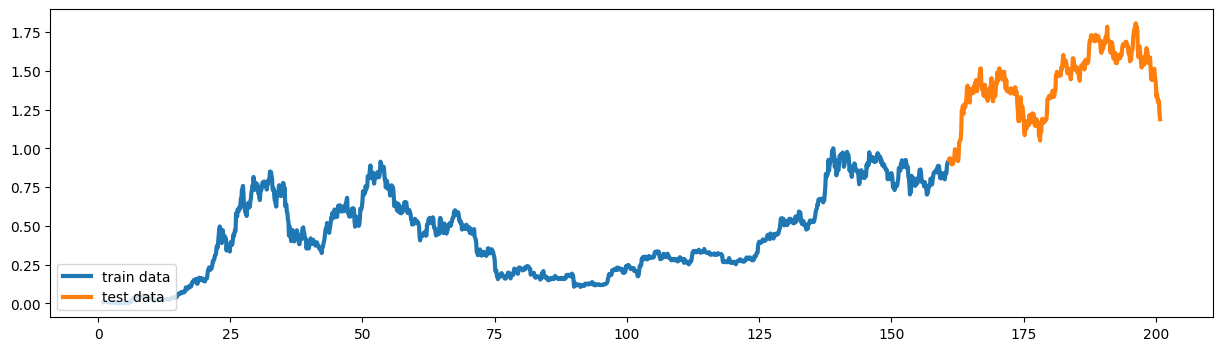

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

look_back  = 12
batch_size = 1


train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = batch_size)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = batch_size)

In [13]:
from keras.models import Sequential
from keras import Input
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model_btc_lstm.keras', monitor='val_loss', mode='min', save_best_only=True)
callback_list = [mc]

n_neurons  = 32

model = Sequential()
model.add(Input(shape=(look_back, n_features)))
model.add(LSTM(n_neurons, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

initial_weights = model.get_weights()

model.fit(train_generator, epochs=200, verbose=1, validation_data=test_generator, callbacks=callback_list)

Epoch 1/200


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0090 - val_loss: 0.0280
Epoch 2/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 3/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0011 - val_loss: 0.0206
Epoch 4/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.5642e-04 - val_loss: 0.0043
Epoch 5/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.0991e-04 - val_loss: 0.0090
Epoch 6/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.6778e-04 - val_loss: 0.0048
Epoch 7/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.9268e-04 - val_loss: 0.0023
Epoch 8/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.4161e-04 - val_loss: 0.0015
Epoch 9/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.1763e-04 - val_loss: 0.0019
Epoch 10/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.9863e-04 - val_loss: 0.0024
Epoch 11/200
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.7829e-04 - val_loss: 0.0012

<Axes: >

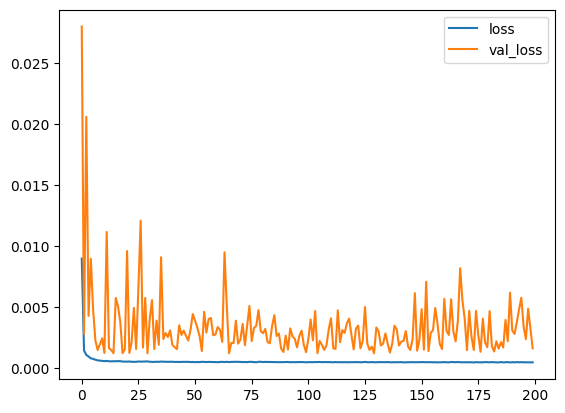

In [14]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [15]:
from keras.models import load_model
model = load_model("best_model_btc_lstm.keras")

In [16]:
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

1587/1587 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.1660e-04
Training loss: 0.0005166010814718902
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012
Testing loss: 0.001219943747855723


In [17]:
test_predictions  = model.predict(test_generator)

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
actual_y_test = np.concatenate([y for x, y in test_generator])
errors = np.abs(actual_y_test - test_predictions)
mape = mean_absolute_percentage_error(actual_y_test, test_predictions) * 100

print("MAPE (mean average precision error):")
print(f"{round(mape, 2)} %")

# MAE - Mean average error
print("\nMAE")
print(round(metrics.mean_absolute_error(actual_y_test, test_predictions), 2), "units")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(actual_y_test, test_predictions), 2), "units^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(actual_y_test, test_predictions)), 2), "units")

print('\nR-squared:')
print(round(metrics.r2_score(actual_y_test, test_predictions), 2))

MAPE (mean average precision error):
1.86 %

MAE
0.03 units

MSE
0.0 units^2

RMSE:
0.03 units

R-squared:
0.97


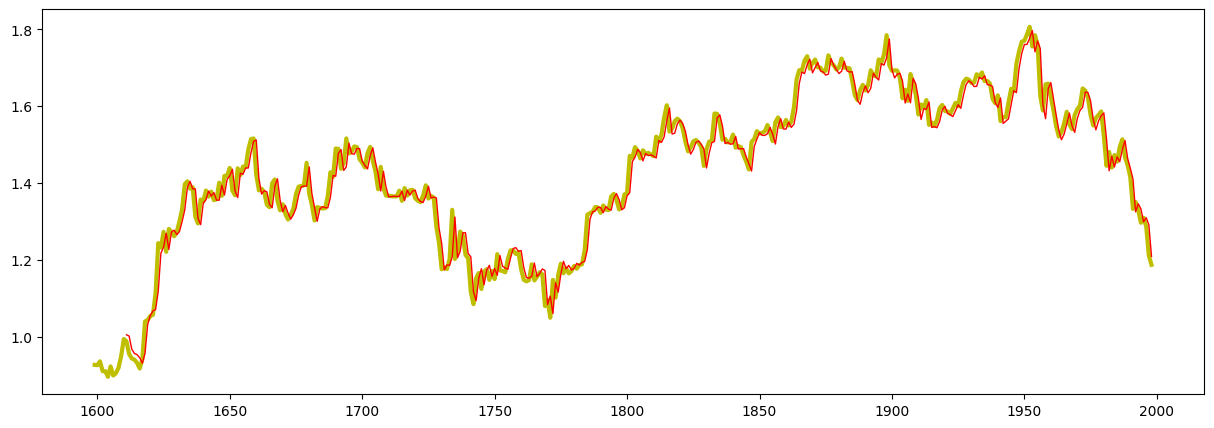

In [ ]:
x1 = np.arange(0, len(y_train))
x2 = np.arange(len(y_train), len(y_train) + len(y_test))
x3 = np.arange(len(y_train) + look_back, len(y_train) + len(y_test))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x2, y_test, lw=3, c='y', label='test data')
ax.plot(x3, test_predictions, lw=1, c='r', label='predictions')
plt.show()

# There is still data leakage even if I apply the MinMaxScaler after the split. I dont understand why because I used the code from the github notebooks

In [20]:
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

1587/1587 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.1660e-04
Training loss: 0.0005166010814718902
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012
Testing loss: 0.001219943747855723


In [21]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

for i in range(500):
    predicted_value = model.predict(current_batch, verbose=None)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

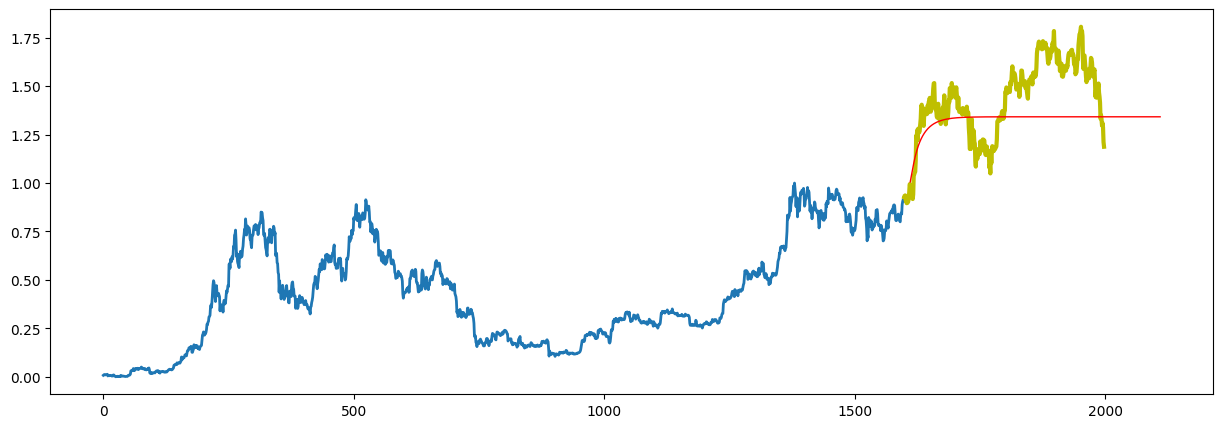

In [22]:
x1 = np.arange(0, len(y_train))
x2 = np.arange(len(y_train), len(y_train) + len(y_test))
x3 = np.arange(len(y_train) + look_back, len(y_train) + len(extrapolation) + look_back)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x1, y_train, lw=2, label='train data')
ax.plot(x2, y_test, lw=3, c='y', label='test data')
ax.plot(x3, extrapolation, lw=1, c='r', label='predictions')
plt.show()

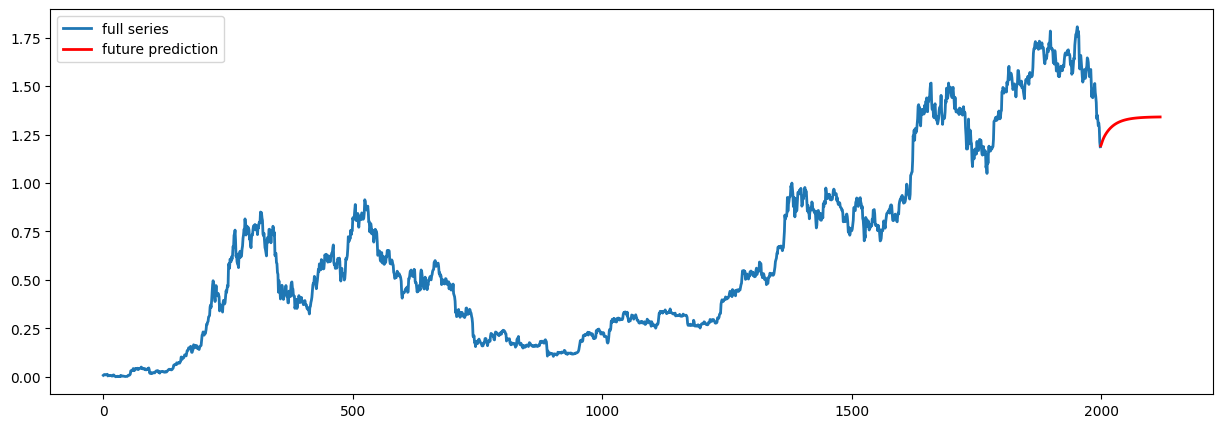

In [ ]:

full_series = df[value_column].values.reshape(-1, 1)

full_series_scaled = scaler.transform(full_series)

extrapolation = []
seed_batch = full_series_scaled[-look_back:].reshape((1, look_back, n_features))
current_batch = seed_batch

n_future = 120   

for i in range(n_future):
    predicted_value = model.predict(current_batch, verbose=None)[0]
    extrapolation.append(predicted_value)
    current_batch = np.append(current_batch[:, 1:, :], [[predicted_value]], axis=1)

extrapolation = np.array(extrapolation)

x1 = np.arange(0, len(full_series_scaled))
x_future = np.arange(len(full_series_scaled),
                     len(full_series_scaled) + len(extrapolation))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x1, full_series_scaled, lw=2, label='full series')
ax.plot(x_future, extrapolation, lw=2, c='r', label='future prediction')
plt.legend()
plt.show()

# The fact that both algorithms (rnn & lstm) predict that the price rises might be a good indicator, that there might be something to it.
# of course, these simple models are not capable for useful predictions